<a href="https://colab.research.google.com/github/tkoritsidis/tkorepka/blob/main/l3594_c1_u1_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod
!pip install matplotlib-venn

In [ ]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.iforest import IForest
from pyod.models.ecod import ECOD
import matplotlib.pyplot as plt

In [ ]:
#εισαγωγή του συνόλου δεδομένων
network_data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/network_traffic_data.csv', delimiter=',')

In [ ]:
#εξαγωγή χαρακτηριστικών (ανεξάρτητων μεταβλητών) για την αναγνώριση ανωμαλιών
features = ['src_port', 'dest_port', 'packet_size', 'num_packets',
            'flow_duration', 'bytes_transferred', 'packet_rate']

X = network_data[features].values

In [ ]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


On Training Data:
ECOD ROC:0.9562, precision @ rank n:0.65

On Test Data:
ECOD ROC:0.935, precision @ rank n:0.4


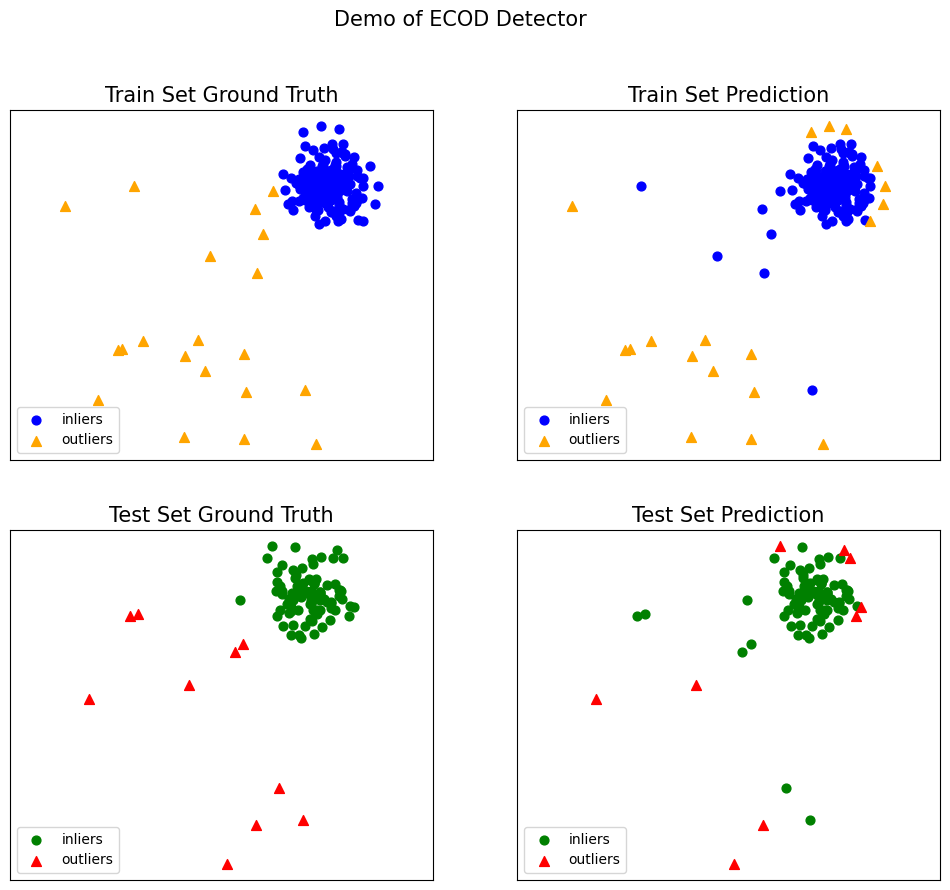

In [ ]:
#χρήση αλγορίθμου Isolation Forest
#model = IForest(contamination=0.02, random_state=42)
#model.fit(X_scaled)
#χρήση αλγορίθμου EDOC

# -*- coding: utf-8 -*-
"""Example of using ECOD for outlier detection
"""
# Author: Yue Zhao <zhaoy@cmu.edu>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.ecod import ECOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

if __name__ == "__main__":
    contamination = 0.1  # percentage of outliers
    n_train = 200  # number of training points
    n_test = 100  # number of testing points

    # Generate sample data
    X_train, X_test, y_train, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

    # train ECOD detector
    clf_name = 'ECOD'
    clf = ECOD()

    # you could try parallel version as well.
    # clf = ECOD(n_jobs=2)
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)


In [ ]:
#πρόβλεψη βαθμού ανωμαλίας (anomaly score)
anomaly_scores = model.decision_function(X_scaled)

In [ ]:
#προσθήκη βαθμού ανωμαλίας (anomaly score) στο σύνολο δεδομένων
network_data['anomaly_score'] = anomaly_scores

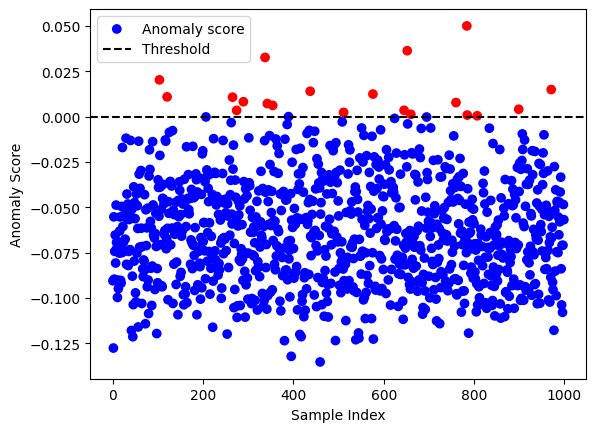

In [ ]:

#οπτικοποίηση αποτελεσμάτων, με μπλε οι τιμές που θεωρούνται κανονικές και με κόκκινο όσες καταγράφονται ως ανωμαλίες
colors = ['blue' if score <= model.threshold_ else 'red' for score in anomaly_scores]

plt.scatter(network_data.index, anomaly_scores, c=colors, label='Anomaly score')
plt.axhline(y=model.threshold_, color='black', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.legend()

In [ ]:
#τύπωση των τιμών που εντοπίσθηκαν ως ανωμαλίες
anomalies = network_data[network_data['anomaly_score'] > model.threshold_]
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
              src_ip          dest_ip  src_port  dest_port protocol  \
103    89.145.197.36    18.163.186.62     65172      62054      UDP   
120      99.1.205.76     53.87.67.219      2323       6690      UDP   
265     71.88.45.195    20.171.132.86     19691      60436      UDP   
274  124.101.237.131     42.206.11.39     14464      63598     ICMP   
289   153.152.11.132   211.36.233.208     63538       3010      UDP   
337    96.163.130.72  159.186.229.190      9670      10496      TCP   
342    148.7.229.199    199.246.71.61     13841      31790      UDP   
354     211.2.143.29   142.204.16.151     61037      12377     ICMP   
437   151.16.132.147  122.199.190.191     44814       2105     ICMP   
511   227.93.182.112     115.47.225.9     58564       2318      TCP   
576    232.167.57.27     165.27.24.95     57598       2156      TCP   
645  250.123.118.120     154.10.37.97      4515      61776     ICMP   
652    186.77.221.40  152.139.153.101     59121      6355